# Install and test gluoncv

Use pip to install gluoncv to the conda_mxnet_p36 environment. The environment is listed in terminal as mxnet_p36. Follow the instructions from GluonCV's installation instructions:

https://gluon-cv.mxnet.io/install/install-more.html

Once the installation is complete via pip, gluon should be in the environment and ready to roll in other notebooks and scripts. 

First check the pip version to make sure it is over pip 9.

In [1]:
!pip --version

pip 10.0.1 from /home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/pip (python 3.6)


Now install gluon, ensuring that mxnet is up to date.

In [1]:
!pip install --upgrade gluoncv

     |████████████████████████████████| 997 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 964 kB 51.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.8 MB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 13.3 MB/s ta 0:00:01
     |████████████████████████████████| 308 kB 56.7 MB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47990 sha256=f9ab87bfced4e0ac48f3777dad13519849d6a97d9c586d1e503441c303bc5bf4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b2/a5/3c/929b91003a3b75a175ccba7cef35200a1890cdb46903f18072
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.16-cp36-cp36m-linux_x86_64.whl size=839832 sha256=c1132ec08bcdd670fb45443a5bd392e37a4133c4731b75f490dd8ff7d911595c
  Stored in directo

## Test install

Now test the installation by following gluon object dectetion tutorial found at: 

https://gluon-cv.mxnet.io/build/examples_detection/demo_yolo.html#sphx-glr-build-examples-detection-demo-yolo-py

The first step is to load the necessary libraries.

In [3]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

Load a pretrained model for deployment.

In [4]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:06, 32174.77KB/s]                            


Download their demo image, load it into the workspace, and make it into a tensor.

In [5]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

100%|██████████| 160/160 [00:00<00:00, 22145.22KB/s]

Shape of pre-processed image: (1, 3, 512, 683)


Pump the image through the network and visualize the results.

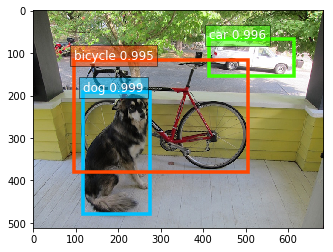

In [6]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()